In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('NationalNames.csv')

In [16]:
# 1

print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [17]:
# 3

print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [18]:
# 6

print(df.groupby('Gender')['Name'].nunique())

Gender
F    64911
M    39199
Name: Name, dtype: int64


In [19]:
# 7

print(df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
      .groupby('Name')['Count'].sum()
      .sort_values(ascending=False).head(5))

Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [20]:
# 8

res = (df.groupby(['Name', 'Year'])['Count'].sum().reset_index(name="Count")
       .sort_values(ascending=False, by='Count'))

print(f'The name is {res.iloc[0]["Name"]} in {res.iloc[0]["Year"]}')

The name is Linda in 1947


In [21]:

# 12

most_unique_names_year = (df.groupby('Year')['Name'].nunique().reset_index(name="Name")
                          .sort_values(ascending=False, by='Name').iloc[0]['Year'])

print(df[(df['Year'] == most_unique_names_year)]
      .groupby('Name')['Count'].sum().reset_index(name="Count")
      .sort_values(ascending=False, by='Count').iloc[0]['Name'])

Jacob


In [22]:

# 13

print(df[(df['Gender'] == 'F') & (df['Name'] == 'Jacob')]
      .groupby(['Name', 'Year'])['Count'].sum().reset_index(name="Count")
      .sort_values(ascending=False, by='Count').head(1))

     Name  Year  Count
45  Jacob  2004    171


In [23]:
# 14
df1 = df
df1['GenderNeutral'] = df1.groupby(['Year', 'Name'])['Gender'].transform('nunique')
print(df1[df1['GenderNeutral'] > 1][['Name', 'Year']].drop_duplicates()
      .groupby('Year')['Name'].nunique()
      .sort_values(ascending=False).head(1))

Year
2008    2557
Name: Name, dtype: int64


In [24]:
# 15
print(df.groupby(['Year'])['Count'].sum().reset_index(name="Count")
      .sort_values(ascending=False, by='Count').head(5))

    Year    Count
77  1957  4200026
79  1959  4156553
80  1960  4154810
81  1961  4139818
78  1958  4131596


In [25]:
# 17

df_F = (df[(df['Gender'] == 'F')].groupby(['Year'])['Count'].sum().reset_index(name="Count"))
df_M = (df[(df['Gender'] == 'M')].groupby(['Year'])['Count'].sum().reset_index(name="Count"))

print(pd.merge(df_F.rename(columns={'Count': 'F'}), df_M.rename(columns={'Count': 'M'})).head(5))

   Year       F       M
0  1880   90993  110491
1  1881   91954  100745
2  1882  107850  113688
3  1883  112321  104629
4  1884  129022  114445


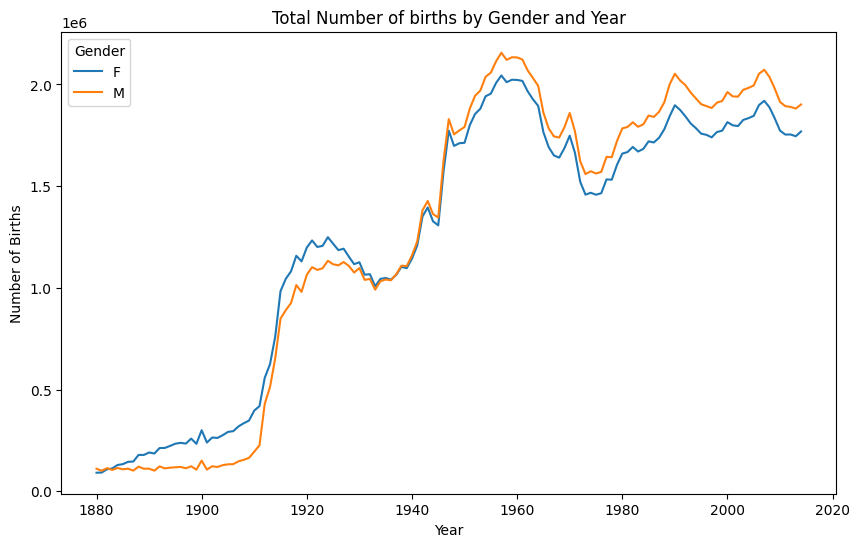

In [26]:
# 19

birth_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

ax = birth_counts.plot(kind='line', figsize=(10, 6))
ax.set_title('Total Number of births by Gender and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births')

plt.show()

In [27]:

# 20

df1 = df
df1['GenderNeutral'] = df1.groupby('Name')['Gender'].transform('nunique')
print(df1[df1['GenderNeutral'] > 1][['Name']].drop_duplicates().count())

Name    10221
dtype: int64


In [28]:

# 22

print(f"Observations have been conducted for a {df['Year'].nunique()} years")

Observations have been conducted for a 135 years


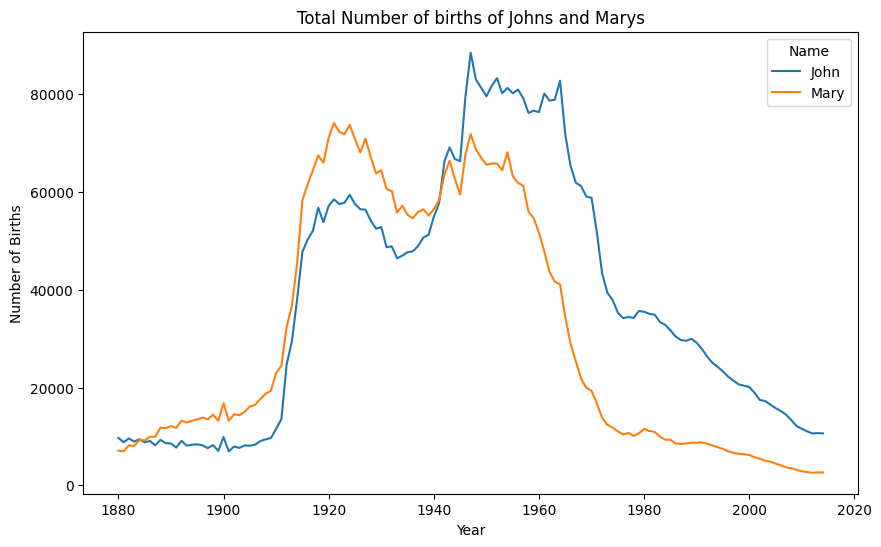

In [29]:
# 25

john_mary = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()

ax = john_mary.plot(kind='line', figsize=(10, 6))
ax.set_title('Total Number of births of Johns and Marys')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births')

plt.show()

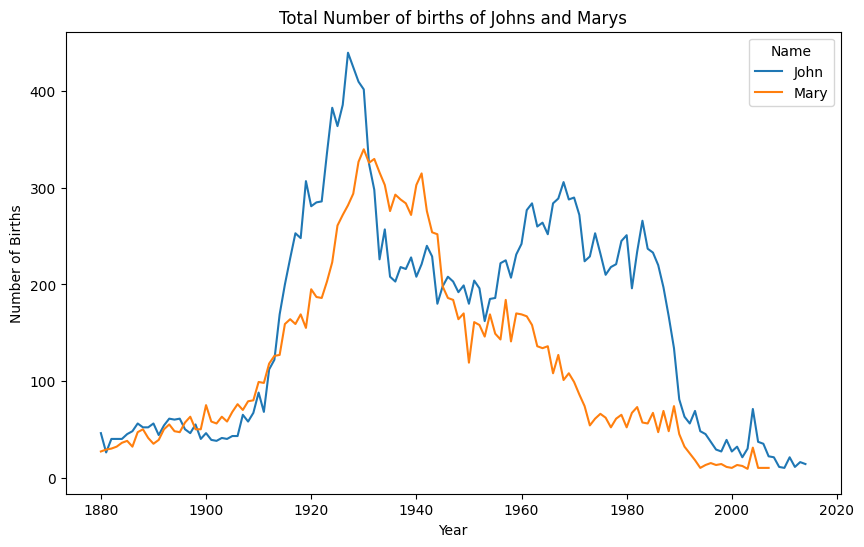

In [30]:
# 26

john_mary = (df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | (df['Name'] == 'Mary') & (df['Gender'] == 'M')]
             .groupby(['Year', 'Name'])['Count'].sum().unstack())

ax = john_mary.plot(kind='line', figsize=(10, 6))
ax.set_title('Total Number of births of Johns and Marys')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births')

plt.show()

In [31]:
# 27

names_ocur_by_year = df.groupby(['Name', 'Year'])['Count'].sum().reset_index(name="Count")
names_ocur_by_year['max_ocur'] = names_ocur_by_year.groupby(['Year'])['Count'].transform('max')

print(names_ocur_by_year[names_ocur_by_year['Count'] == names_ocur_by_year['max_ocur']].sort_values(by='Year'))

             Name  Year  Count  max_ocur
768543       John  1880   9701      9701
768544       John  1881   8795      8795
768545       John  1882   9597      9597
768546       John  1883   8934      8934
768547       John  1884   9428      9428
...           ...   ...    ...       ...
667232   Isabella  2010  22913     22913
1450263    Sophia  2011  21839     21839
1450264    Sophia  2012  22285     22285
1450265    Sophia  2013  21172     21172
498533       Emma  2014  20811     20811

[135 rows x 4 columns]
